# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [140]:

# Mice weight vs Tumor volume has positive correlation +0.84
# Tumor in Male mices 2% higher than Femail, 51% Males vs 49% females
#The only Drug Regimen that has outliner is Infobinol at: 36.321346 Tumor volume

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(study_results , mouse_metadata , how="left", on="Mouse ID")
mice_df.info()
# Display the data table for preview
mice_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [115]:
# Checking the number of mice.
count_mice = mice_df["Mouse ID"].nunique()
count_mice

249

In [116]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_df[mice_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [117]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_mouse_id = mice_df['Mouse ID'].unique
duplicate_row_series = mice_df["Mouse ID"].isin(duplicate_mice)
duplicate_mouse = mice_df[mice_df.duplicated(subset = ['Mouse ID'], keep = False)]
dup_mice_df = mice_df.loc[mice_df["Mouse ID"] == "g989", :]
dup_mice_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [118]:
clean_df = mice_df.loc[~duplicate_row_series]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [119]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary Statistics

In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = clean_df.groupby(['Drug Regimen'])

summary_mean = summary_df['Tumor Volume (mm3)'].mean()
summary_med = summary_df['Tumor Volume (mm3)'].median()
summary_var = summary_df['Tumor Volume (mm3)'].var()
summary_std = summary_df['Tumor Volume (mm3)'].std()
summary_sem = summary_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
                        "Mean Tumor Volume": summary_mean,
                        "Median Tumor Volume" : summary_med,
                        "Tumor Volume Variance" : summary_var,
                        "Tumor Volume Std. Dev." : summary_std,
                        "Tumor Volume Std. Err." : summary_sem
                        })
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [121]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_agg_df = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

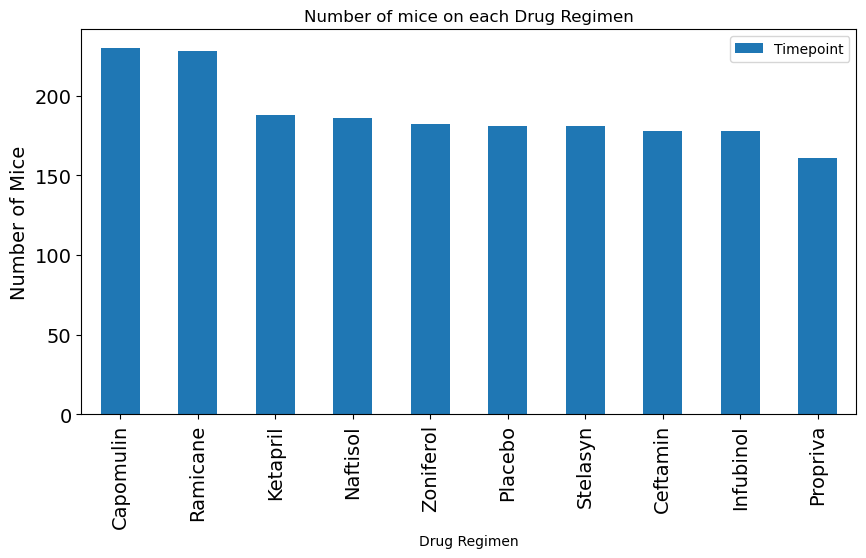

In [122]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar(figsize=(10,5), title ="Number of mice on each Drug Regimen",fontsize = 14)  
plt.ylabel("Number of Mice",fontsize = 14)
plt.legend(loc="best")                                  
plt.show()

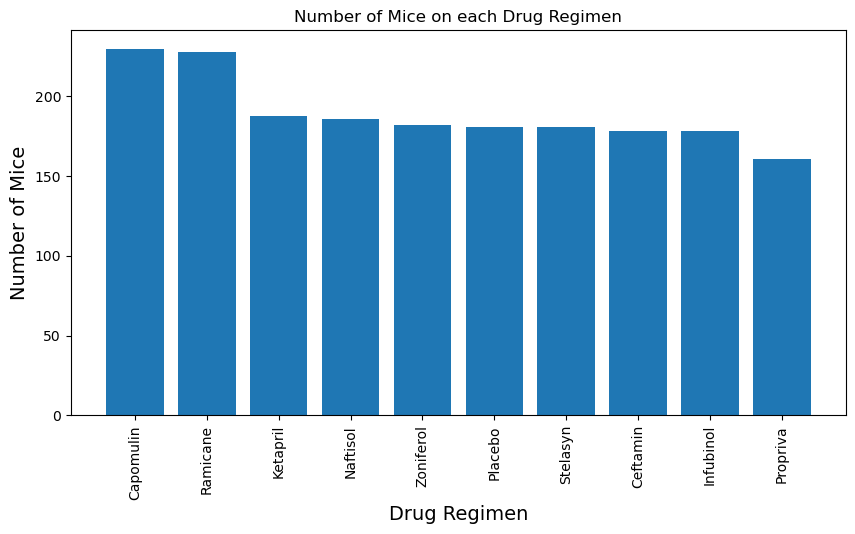

In [123]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_desc = timepoint.sort_values(ascending=False)            
plt.figure(figsize=(10,5))                                             
plt.bar(timepoint_desc.index, timepoint_desc.values)                  
plt.title("Number of Mice on each Drug Regimen")                      
plt.xlabel('Drug Regimen', size=14)                                
plt.ylabel('Number of Mice', size=14)                            
plt.xticks(rotation='vertical')                                  
plt.show()

<Axes: title={'center': 'Female v Male Distribution'}, ylabel='Sex'>

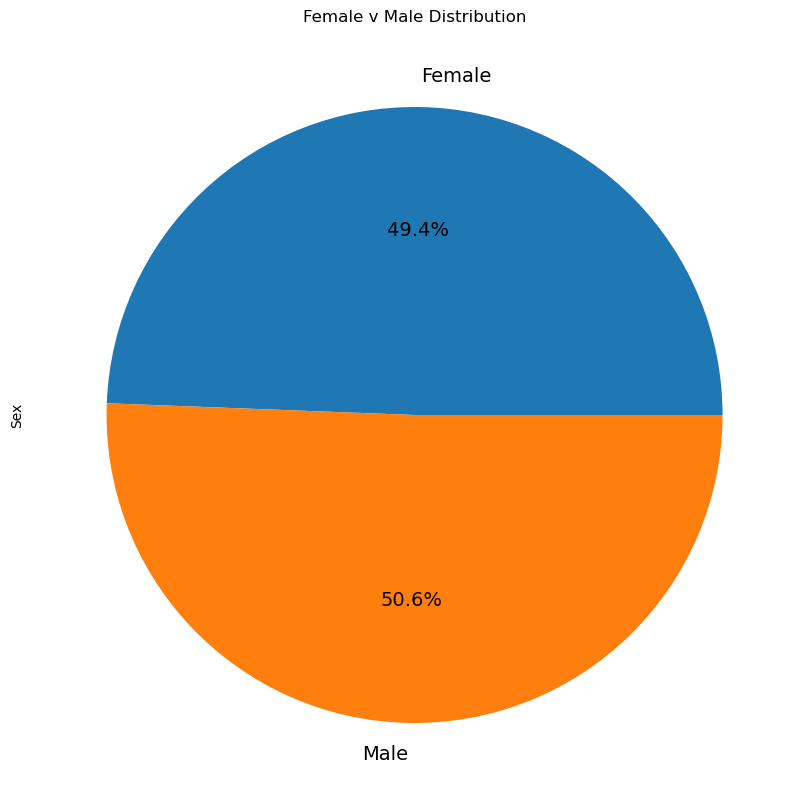

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby(['Sex'])['Sex'].count()           
sex.plot.pie(title="Female v Male Distribution",autopct='%1.1f%%', figsize=(10, 10),fontsize = 14)   

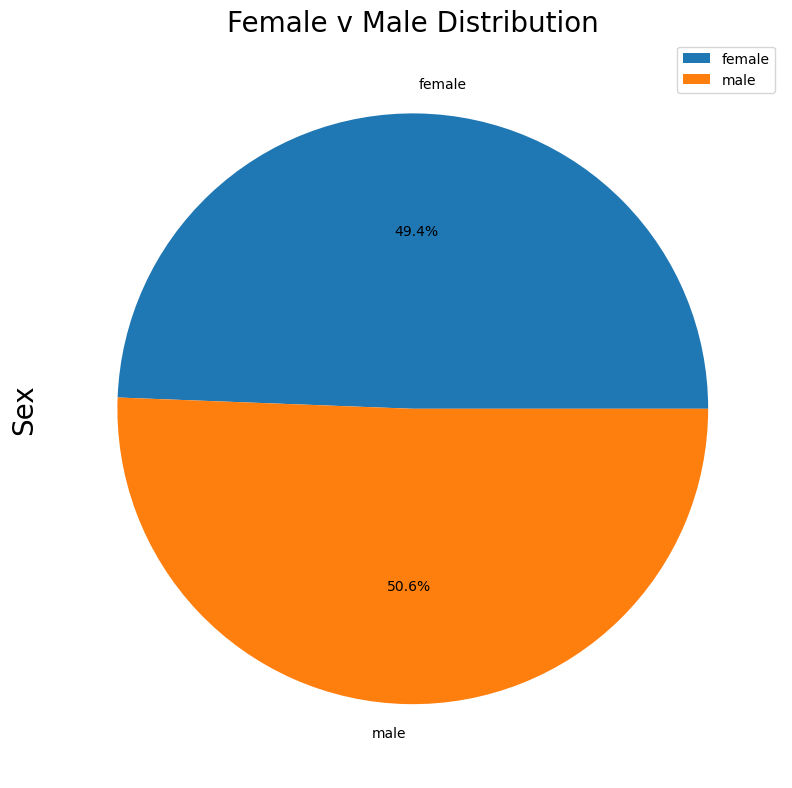

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8,8))
plt.pie(sex, labels=('female', 'male'), autopct='%1.1f%%')
plt.title("Female v Male Distribution",fontsize = 20)                         
plt.ylabel('Sex', size=20)                                           
plt.tight_layout()                                            
plt.legend(loc= "best")                                       
plt.show()


## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse
greatest_tp = clean_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
greatest_tp

Drug Regimen  Mouse ID
Capomulin     b128        45
              b742        45
              f966        20
              g288        45
              g316        45
                          ..
Zoniferol     q633        45
              s337        45
              w140         5
              w575        45
              x613        15
Name: Timepoint, Length: 249, dtype: int64

In [127]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_tp_df = pd.DataFrame(greatest_tp)
greatest_tp_df = pd.merge(greatest_tp_df, clean_df, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
#greatest_tp_df.info()
greatest_tp_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
244,Zoniferol,q633,45,70.827796,2,Male,12,25
245,Zoniferol,s337,45,62.109651,4,Male,14,27
246,Zoniferol,w140,5,47.717952,0,Female,19,30
247,Zoniferol,w575,45,68.401286,3,Female,16,28


In [128]:
# Put treatments into a list for for loop (and later for plot labels)
treatment= ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    volume_df = greatest_tp_df.loc[greatest_tp_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    
# Determine Quartiles, IQR, Lower Bound, Upper Bound    
    quartiles = volume_df.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

# Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]
   # print(f"{(outliers)}")
    print(f"Outlier: {(outliers)}")


Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [129]:
iqr

15.577752179999997

In [130]:
lower_bound

25.355449580000002

In [131]:
upper_bound

87.66645829999999

In [132]:
tumor_vol

[0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 175    38.407618
 176    43.047543
 177    38.810366
 178    32.978522
 179    38.342008
 180    33.397653
 181    37.311236
 182    40.659006
 183    29.128472
 184    33.562402
 185    36.374510
 186    31.560470
 187    36.134852
 188    22.050126
 189    30.564625
 190    31.095335
 191    45.220869
 192    36.561652
 193    37.225650
 194    43.419381
 195    30.276232
 196    40.667713
 197    43.166373
 198    44.183451
 199    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 50    67.973419
 51    65.525743
 52  

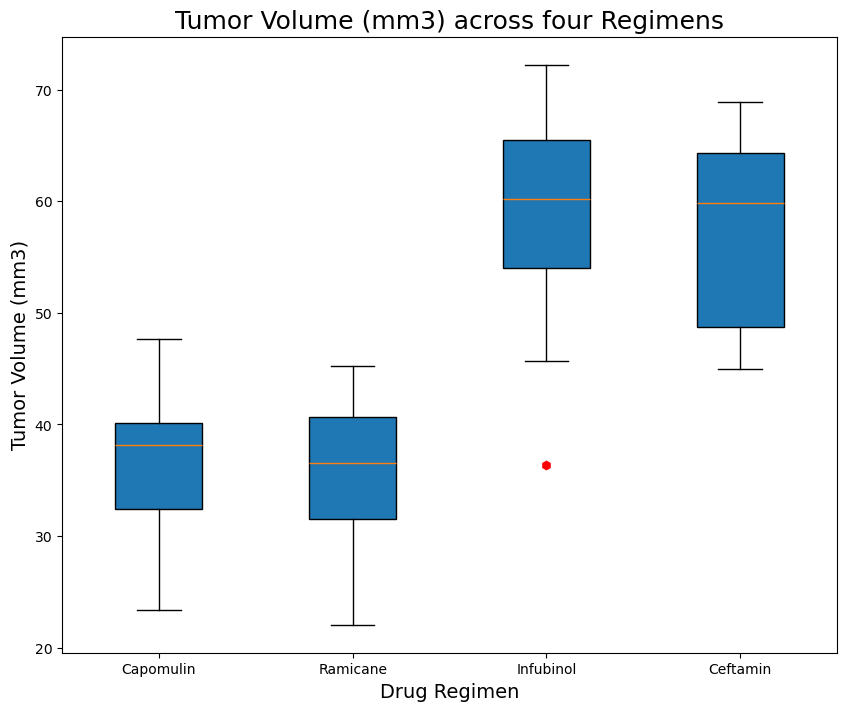

In [133]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor="r",marker="h", markeredgecolor="r")
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.boxplot(tumor_vol, flierprops=red_dot, patch_artist=True)
ax1.set_title("Tumor Volume (mm3) across four Regimens",fontsize =18)
ax1.set_xlabel("Drug Regimen",fontsize = 14)
ax1.set_ylabel("Tumor Volume (mm3)",fontsize = 14)
ax1.xaxis.set(ticks=range(1,len(treatment) + 1),ticklabels=treatment)

plt.show()

## Line and Scatter Plots

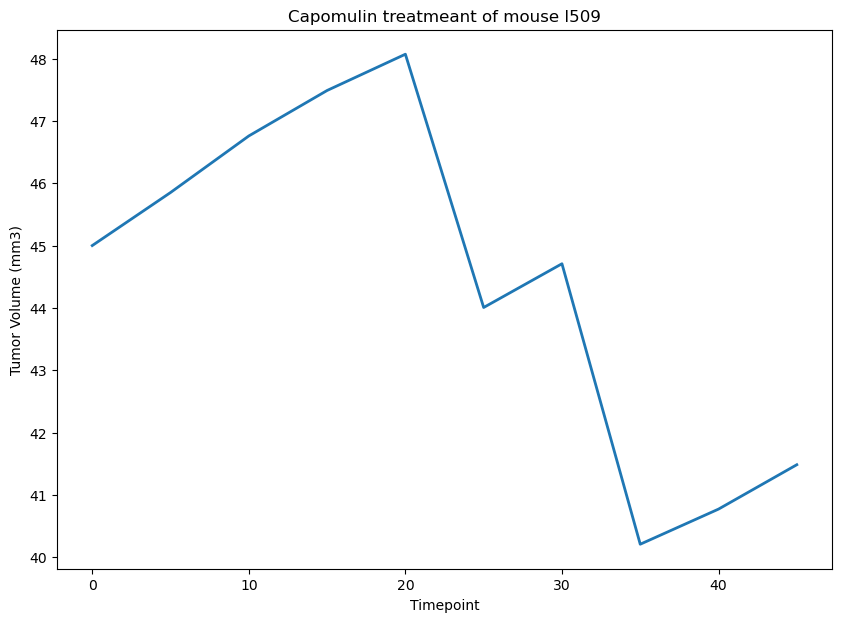

In [134]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin 
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df
time = line_df["Timepoint"]
vol = line_df["Tumor Volume (mm3)"] 

#print(random_mouse["Mouse ID"])
plt.figure(figsize=(10,7))
line, = plt.plot(time, vol, linewidth=2, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")

plt.show()

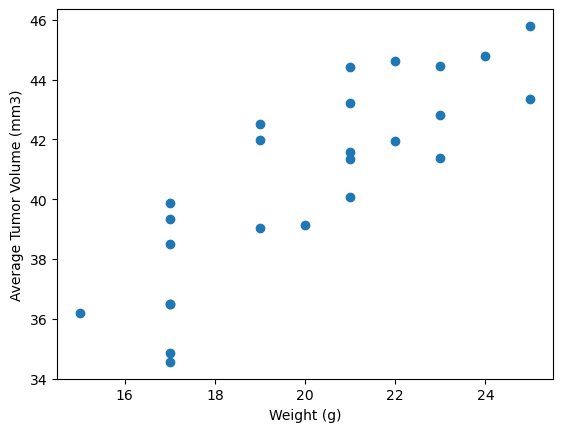

In [135]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
vol_avg_tumor = scatter_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()    
vol_avg_weight = scatter_df.groupby('Mouse ID')['Weight (g)'].mean()

# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the vol_avg dataframe
plt.scatter(vol_avg_weight,vol_avg_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
#vol_avg

In [136]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_df[mice_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


### Correlation and Regression

In [137]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation, p_value = pearsonr(vol_avg_weight,vol_avg_tumor)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.8419363424694721


In [138]:
# calculating linear regression values 
lin_reg = st.linregress(vol_avg_weight,vol_avg_tumor) 
lin_reg

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

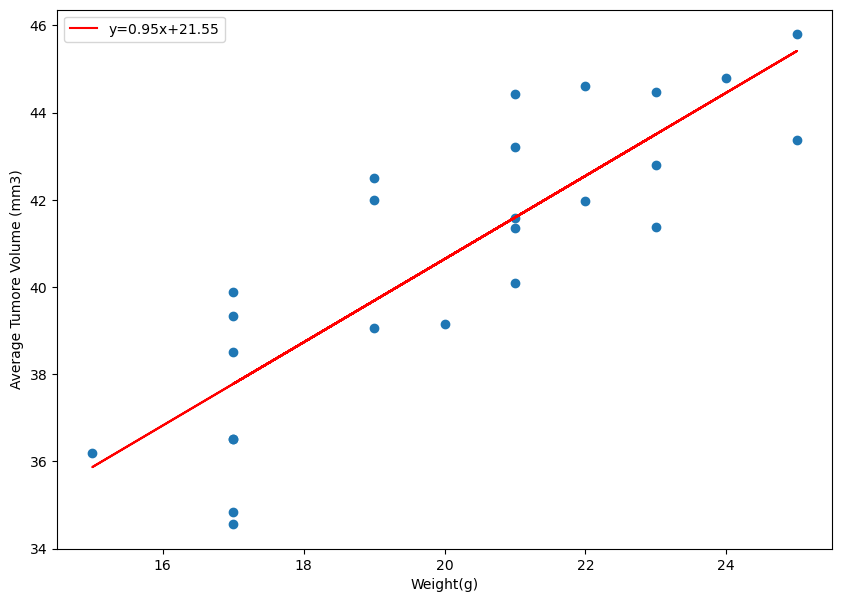

In [139]:
# ploting the regression line
# calculating the linear line plot list of values
line = slope * (vol_avg_weight) + intercept

# create the scatter plot like above
plt.figure(figsize=(10,7))
plt.scatter(vol_avg_weight,vol_avg_tumor)

# plot the linear regression line which is the averaged line of all the values in red
plt.plot(vol_avg_weight, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend(loc="best")                                
plt.savefig('linearregression')
plt.show()